In [ ]:
#!pip install matplotlib-venn

In [5]:
# Import Required module

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

In [2]:
# Mount google drive first

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
!cp -R /content/drive/MyDrive/Data\ Analytics/AI\ ML/Helper_Functions /content

cp: cannot open '/content/drive/MyDrive/Data Analytics/AI ML/Helper_Functions/README.md.gdoc' for reading: Operation not supported


In [7]:
from Helper_Functions import classification_utils, common_utils

In [8]:
# Read data from CSV using read_csv method of pandas
# data = pd.read_csv(path_of_the_csv)

income_data_train = pd.read_csv("/content/drive/MyDrive/Data Analytics/AI_ML/Classification/income/train.csv")
#here just printing the training data set
income_data_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


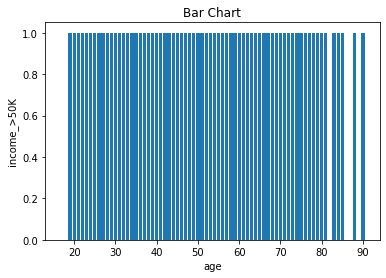

In [9]:
plt.bar(income_data_train['age'], income_data_train['income_>50K'])

plt.title("Bar Chart")
  
# Setting the X and Y labels
plt.xlabel('age')
plt.ylabel('income_>50K')
  
# Adding the legends
plt.show()

In [17]:
income_data_train.head

<bound method NDFrame.head of        age  workclass  fnlwgt     education  educational-num  \
0       67    Private  366425     Doctorate               16   
1       17    Private  244602          12th                8   
2       31    Private  174201     Bachelors               13   
3       58  State-gov  110199       7th-8th                4   
4       25  State-gov  149248  Some-college               10   
...    ...        ...     ...           ...              ...   
43952   52    Private   68982     Bachelors               13   
43953   19    Private  116562       HS-grad                9   
43954   30    Private  197947  Some-college               10   
43955   46    Private   97883     Bachelors               13   
43956   30    Private  375827       HS-grad                9   

           marital-status         occupation    relationship   race  gender  \
0                Divorced    Exec-managerial   Not-in-family  White    Male   
1           Never-married      Other-servic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


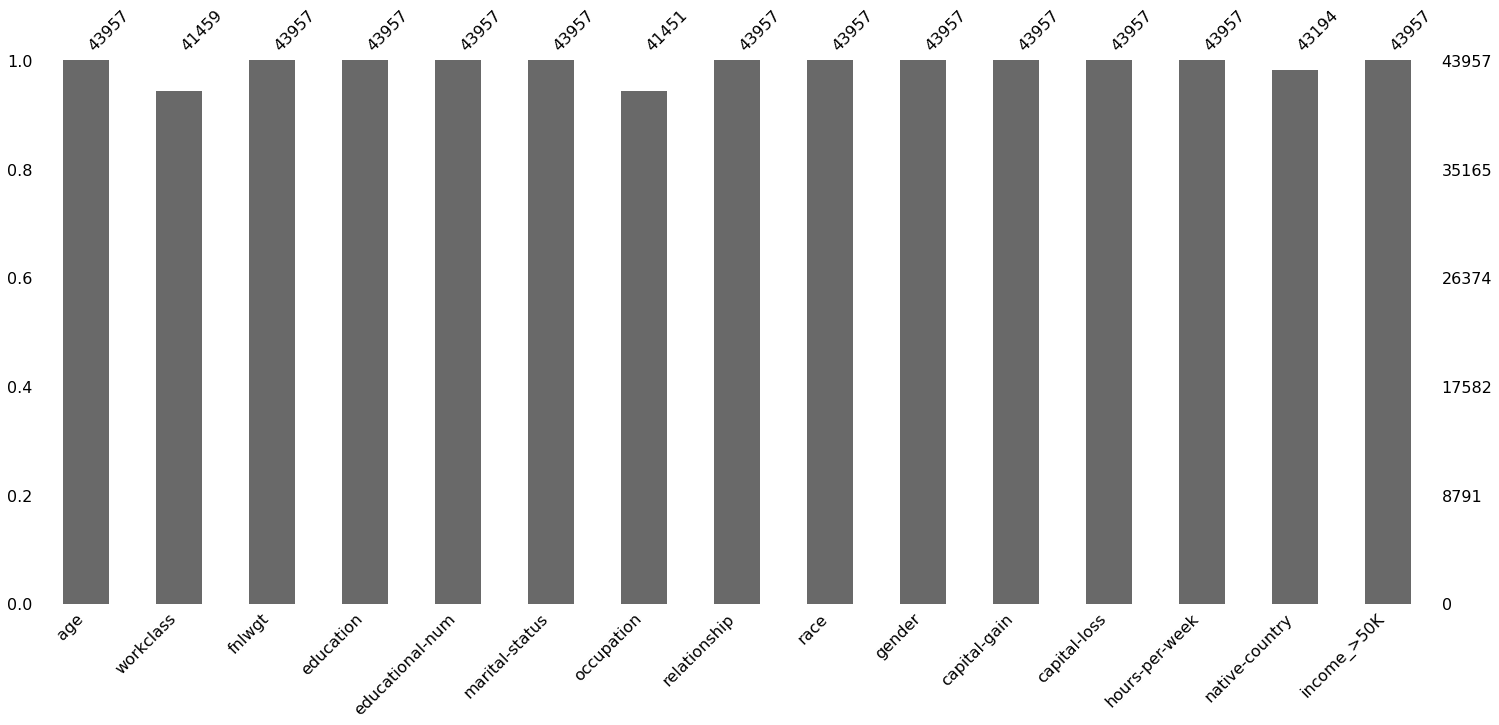

In [10]:
income_data_train.info()
msno.bar(income_data_train)

In [11]:
columns = [ col for col in list(income_data_train.columns)]
columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income_>50K']

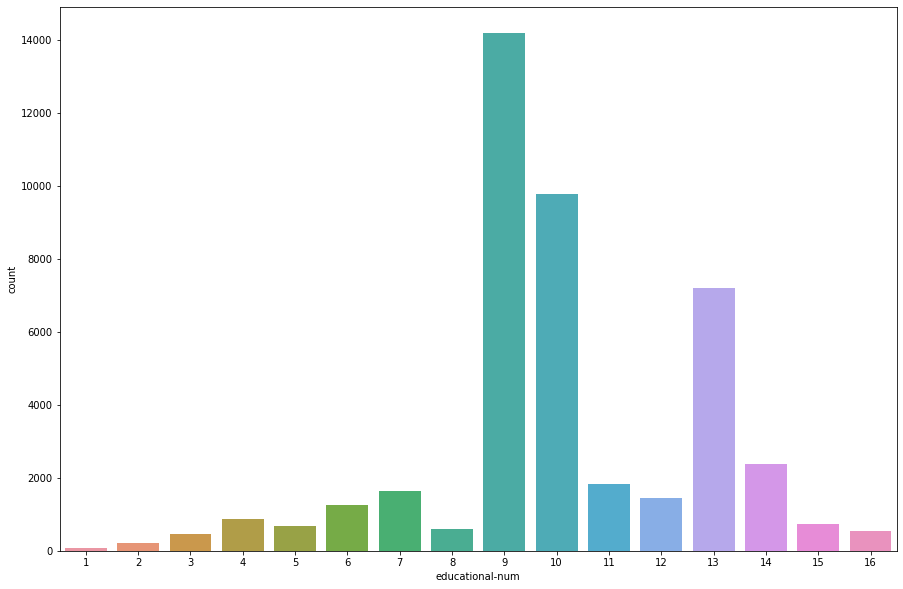

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(data = income_data_train, x = columns[4])

In [16]:
income_data_train[columns[4]].value_counts()

9     14197
10     9790
13     7219
14     2392
11     1831
7      1647
12     1447
6      1250
4       862
15      748
5       684
8       587
16      536
3       468
2       223
1        76
Name: educational-num, dtype: int64

In [6]:
# Get dataset information 

common_utils.get_dataset_info(income_data_train, show_columns=True)

Head:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   67    Private  366425     Doctorate               16            Divorced   
1   17    Private  244602          12th                8       Never-married   
2   31    Private  174201     Bachelors               13  Married-civ-spouse   
3   58  State-gov  110199       7th-8th                4  Married-civ-spouse   
4   25  State-gov  149248  Some-college               10       Never-married   

         occupation   relationship   race gender  capital-gain  capital-loss  \
0   Exec-managerial  Not-in-family  White   Male         99999             0   
1     Other-service      Own-child  White   Male             0             0   
2   Exec-managerial        Husband  White   Male             0             0   
3  Transport-moving        Husband  White   Male             0             0   
4     Other-service  Not-in-family  Black   Male             0             0   

   hours-per-week native-country

In [288]:
# Read data from CSV using read_csv method of pandas
# data = pd.read_csv(path_of_the_csv)

income_data_test = pd.read_csv("/content/drive/MyDrive/Data Analytics/AI_ML/Classification/income/test.csv")
#here just printing the testing data set
income_data_test.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,38.576196,194150.017798,10.185762,728.913237,111.929922,41.121246
std,13.079061,104945.494349,2.477511,4355.969800,442.980441,12.397005
min,17.000000,21472.000000,1.000000,0.000000,0.000000,2.000000
25%,28.000000,120925.500000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,181434.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,243670.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,857532.000000,16.000000,99999.000000,2415.000000,99.000000


In [289]:
# Get dataset information 

common_utils.get_dataset_info(income_data_test, show_columns=True)

Head:
   age         workclass  fnlwgt   education  educational-num  \
0   39  Self-emp-not-inc  327120     HS-grad                9   
1   32           Private  123253  Assoc-acdm               12   
2   47           Private  232628     HS-grad                9   
3   19           Private  374262        12th                8   
4   46  Self-emp-not-inc  311231     HS-grad                9   

       marital-status         occupation relationship   race gender  \
0  Married-civ-spouse       Craft-repair      Husband  White   Male   
1  Married-civ-spouse       Craft-repair      Husband  White   Male   
2  Married-civ-spouse       Craft-repair      Husband  Black   Male   
3       Never-married  Handlers-cleaners    Own-child  White   Male   
4  Married-civ-spouse    Farming-fishing      Husband  White   Male   

   capital-gain  capital-loss  hours-per-week native-country  
0             0             0              40       Portugal  
1             0             0              42  Uni

In [290]:
# check the count and % of missing data

common_utils.get_count_and_percentage_missing_values(income_data_train)

                 count  % null
age                  0     0.0
workclass         2498     5.7
fnlwgt               0     0.0
education            0     0.0
educational-num      0     0.0
marital-status       0     0.0
occupation        2506     5.7
relationship         0     0.0
race                 0     0.0
gender               0     0.0
capital-gain         0     0.0
capital-loss         0     0.0
hours-per-week       0     0.0
native-country     763     1.7
income_>50K          0     0.0


In [291]:
print(income_data_train["occupation"].nunique(), income_data_train["occupation"].unique())
print(income_data_train["native-country"].nunique(), income_data_train["native-country"].unique())
print(income_data_train["workclass"].nunique(), income_data_train["workclass"].unique())

14 ['Exec-managerial' 'Other-service' 'Transport-moving' 'Adm-clerical'
 'Machine-op-inspct' 'Sales' 'Handlers-cleaners' 'Farming-fishing'
 'Protective-serv' 'Prof-specialty' 'Craft-repair' nan 'Tech-support'
 'Priv-house-serv' 'Armed-Forces']
41 ['United-States' 'Japan' 'South' 'Portugal' 'Italy' 'Mexico' 'Ecuador'
 'England' 'Philippines' 'China' 'Germany' nan 'Dominican-Republic'
 'Jamaica' 'Vietnam' 'Thailand' 'Puerto-Rico' 'Cuba' 'India' 'Cambodia'
 'Yugoslavia' 'Iran' 'El-Salvador' 'Poland' 'Greece' 'Ireland' 'Canada'
 'Guatemala' 'Scotland' 'Columbia' 'Outlying-US(Guam-USVI-etc)' 'Haiti'
 'Peru' 'Nicaragua' 'Taiwan' 'France' 'Trinadad&Tobago' 'Laos' 'Hungary'
 'Honduras' 'Hong' 'Holand-Netherlands']
8 ['Private' 'State-gov' 'Self-emp-not-inc' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' nan 'Never-worked' 'Without-pay']


In [200]:
#income_data_train = income_data_train.apply(lambda x: x.fillna(x.value_counts().index[0]))
#income_data_train

# mode to fill NaN values

In [292]:
stats.mode(income_data_train["workclass"])[0][0]

'Private'

In [293]:
from scipy import stats
lst = ["occupation", "native-country", "workclass"]

for val in lst:
  income_data_train[val] = income_data_train[val].fillna(stats.mode(income_data_train[val])[0][0])

#income_data_train['native-country'] = income_data_train['native-country'].fillna('NC1')
#income_data_train['workclass'] = income_data_train['workclass'].fillna('WP1')

In [294]:
print(income_data_train["occupation"].nunique(), income_data_train["occupation"].unique())
print(income_data_train["native-country"].nunique(), income_data_train["native-country"].unique())
print(income_data_train["workclass"].nunique(), income_data_train["workclass"].unique())

14 ['Exec-managerial' 'Other-service' 'Transport-moving' 'Adm-clerical'
 'Machine-op-inspct' 'Sales' 'Handlers-cleaners' 'Farming-fishing'
 'Protective-serv' 'Prof-specialty' 'Craft-repair' 'Tech-support'
 'Priv-house-serv' 'Armed-Forces']
41 ['United-States' 'Japan' 'South' 'Portugal' 'Italy' 'Mexico' 'Ecuador'
 'England' 'Philippines' 'China' 'Germany' 'Dominican-Republic' 'Jamaica'
 'Vietnam' 'Thailand' 'Puerto-Rico' 'Cuba' 'India' 'Cambodia' 'Yugoslavia'
 'Iran' 'El-Salvador' 'Poland' 'Greece' 'Ireland' 'Canada' 'Guatemala'
 'Scotland' 'Columbia' 'Outlying-US(Guam-USVI-etc)' 'Haiti' 'Peru'
 'Nicaragua' 'Taiwan' 'France' 'Trinadad&Tobago' 'Laos' 'Hungary'
 'Honduras' 'Hong' 'Holand-Netherlands']
8 ['Private' 'State-gov' 'Self-emp-not-inc' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Never-worked' 'Without-pay']


In [295]:
common_utils.get_count_and_percentage_missing_values(income_data_train)

                 count  % null
age                  0     0.0
workclass            0     0.0
fnlwgt               0     0.0
education            0     0.0
educational-num      0     0.0
marital-status       0     0.0
occupation           0     0.0
relationship         0     0.0
race                 0     0.0
gender               0     0.0
capital-gain         0     0.0
capital-loss         0     0.0
hours-per-week       0     0.0
native-country       0     0.0
income_>50K          0     0.0


In [296]:
# check the count and % of missing data

common_utils.get_count_and_percentage_missing_values(income_data_test)

                 count  % null
age                  0     0.0
workclass            0     0.0
fnlwgt               0     0.0
education            0     0.0
educational-num      0     0.0
marital-status       0     0.0
occupation           0     0.0
relationship         0     0.0
race                 0     0.0
gender               0     0.0
capital-gain         0     0.0
capital-loss         0     0.0
hours-per-week       0     0.0
native-country       0     0.0


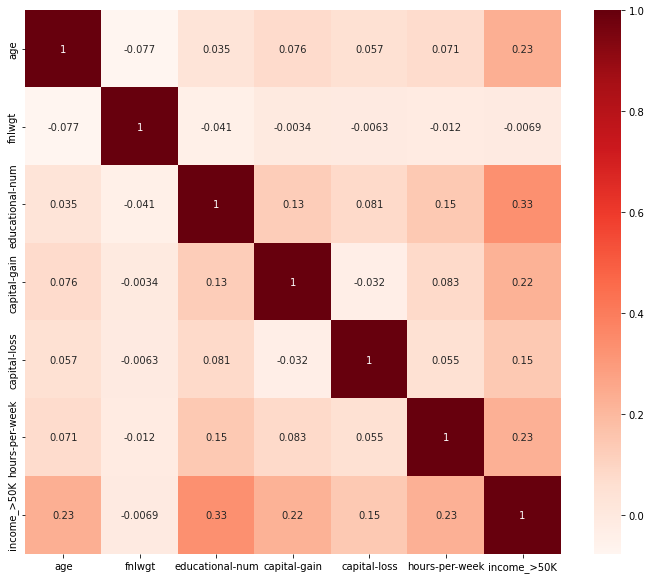

In [297]:
#plotting the heatmap

plt.figure(figsize=(12, 10))
corr = income_data_train.corr()
sns.heatmap(corr, annot = True, cmap=plt.cm.Reds)
plt.show()

In [298]:
print(corr["income_>50K"].sort_values(ascending=False), '\n')

income_>50K        1.000000
educational-num    0.334035
age                0.230988
hours-per-week     0.227918
capital-gain       0.223325
capital-loss       0.145250
fnlwgt            -0.006852
Name: income_>50K, dtype: float64 



In [299]:
# dropping fnlwgt table

new_train_data = income_data_train.drop('fnlwgt', axis=1, inplace=False)
new_train_data.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


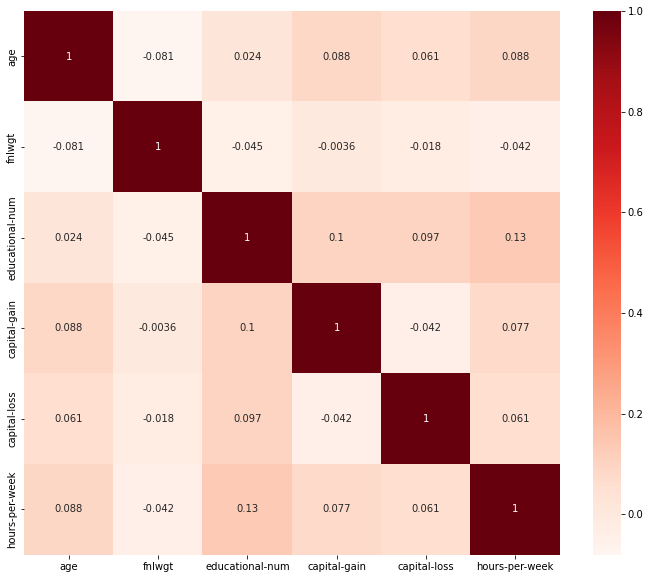

In [300]:
#plotting the heatmap

plt.figure(figsize=(12, 10))
corr = income_data_test.corr()
sns.heatmap(corr, annot = True, cmap=plt.cm.Reds)
plt.show()

In [301]:
# dropping fnlwgt table who's ha

new_test_data = income_data_test.drop('fnlwgt', axis=1, inplace=False)
new_test_data.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,899.000000,899.000000,899.000000,899.000000,899.000000
mean,38.576196,10.185762,728.913237,111.929922,41.121246
std,13.079061,2.477511,4355.969800,442.980441,12.397005
min,17.000000,1.000000,0.000000,0.000000,2.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,2415.000000,99.000000


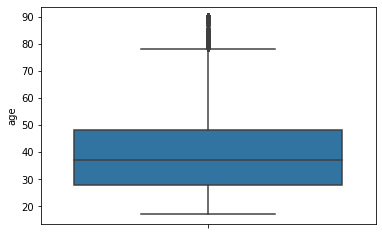

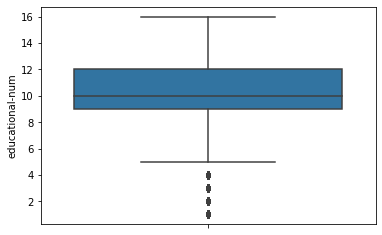

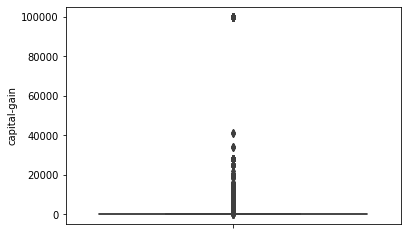

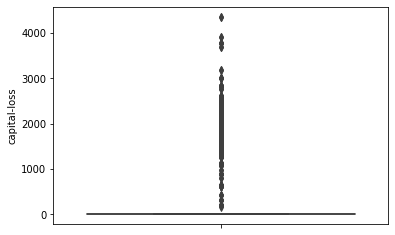

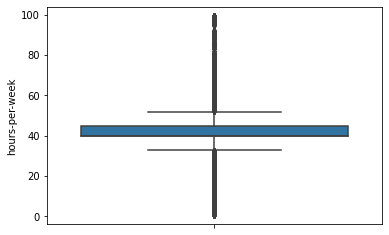

In [302]:
# checking is there any outliars

list1 = ["age", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]

for col in list1:
    sns.boxplot(y = col, data = new_train_data)
    plt.show()


In [237]:
income_data_train["capital-loss"].value_counts()

0       41884
1902      276
1977      225
1887      201
2415       65
        ...  
2467        1
1539        1
1421        1
2201        1
155         1
Name: capital-loss, Length: 97, dtype: int64

In [303]:
# IQR - Inter quartile range
age20 = new_train_data['age'].quantile(0.25)
age80 = new_train_data['age'].quantile(0.75)

iqr = age80 - age20

upper_limit = age80 + 1.5 * iqr
lower_limit = age20 - 1.5 * iqr

new_train_data[new_train_data['age'] > upper_limit]
new_train_data[new_train_data['age'] < lower_limit]

new_data1 = new_train_data[new_train_data['age'] < upper_limit]

new_data1.shape

(43733, 14)

In [304]:
edu_num20 = new_train_data['educational-num'].quantile(0.55)
edu_num70 = new_train_data['educational-num'].quantile(0.45)

iqr = edu_num70 - edu_num20

upper_limit = edu_num70 + 1.5 * iqr
lower_limit = edu_num20 - 1.5 * iqr

new_train_data[new_train_data['educational-num'] > upper_limit]
new_train_data[new_train_data['educational-num'] < lower_limit]

new_data1 = new_train_data[new_train_data['educational-num'] < upper_limit]

new_data1.shape

(5210, 14)

In [305]:
hr_num30 = new_train_data['hours-per-week'].quantile(0.30)
hr_num70 = new_train_data['hours-per-week'].quantile(0.70)

iqr = hr_num70 - hr_num30

upper_limit = hr_num70 + 1.5 * iqr
lower_limit = hr_num30 - 1.5 * iqr

new_train_data[new_train_data['hours-per-week'] > upper_limit]
new_train_data[new_train_data['hours-per-week'] < lower_limit]

new_data1 = new_train_data[new_train_data['hours-per-week'] < upper_limit]

new_data1.shape

(10540, 14)

In [306]:
new_data1.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000
mean,36.857116,9.599336,541.736717,58.200949,25.369829,0.094118
std,17.768388,2.527747,4890.271321,329.209955,9.419826,0.292006
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,9.000000,0.000000,0.000000,20.000000,0.000000
50%,32.000000,10.000000,0.000000,0.000000,25.000000,0.000000
75%,49.000000,10.000000,0.000000,0.000000,35.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,39.000000,1.000000


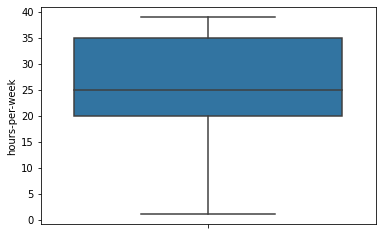

In [307]:
sns.boxplot(y = "hours-per-week", data = new_data1)
plt.show()

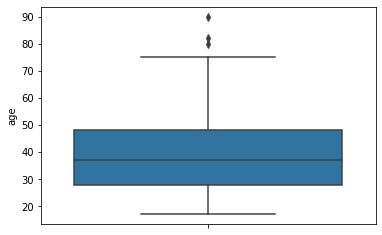

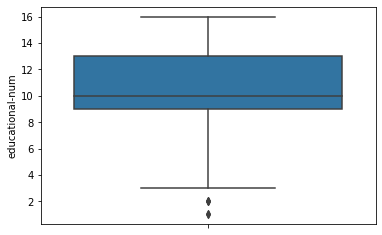

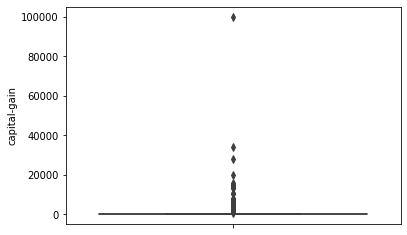

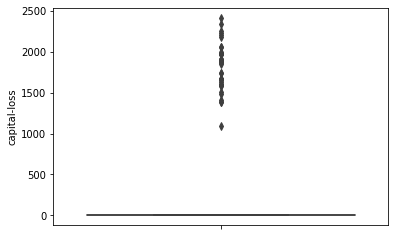

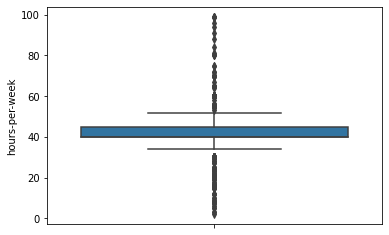

In [308]:
# checking is there any outliars

list1 = ["age", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]

for col in list1:
    sns.boxplot(y = col, data = new_test_data)
    plt.show()

In [309]:
# IQR - Inter quartile range
age20 = income_data_test['age'].quantile(0.25)
age80 = income_data_test['age'].quantile(0.75)

iqr = age80 - age20

upper_limit = age80 + 1.5 * iqr
lower_limit = age20 - 1.5 * iqr

income_data_test[income_data_test['age'] > upper_limit]
income_data_test[income_data_test['age'] < lower_limit]

new_data2 = income_data_test[income_data_test['age'] < upper_limit]

new_data2.shape

(896, 14)

In [310]:
edu_num20 = income_data_test['educational-num'].quantile(0.55)
edu_num70 = income_data_test['educational-num'].quantile(0.45)

iqr = edu_num70 - edu_num20

upper_limit = edu_num70 + 1.5 * iqr
lower_limit = edu_num20 - 1.5 * iqr

income_data_test[income_data_test['educational-num'] > upper_limit]
income_data_test[income_data_test['educational-num'] < lower_limit]

new_data2 = income_data_test[income_data_test['educational-num'] < upper_limit]

new_data2.shape

(93, 14)

In [311]:
hr_num30 = income_data_test['hours-per-week'].quantile(0.30)
hr_num70 = income_data_test['hours-per-week'].quantile(0.70)

iqr = hr_num70 - hr_num30

upper_limit = hr_num70 + 1.5 * iqr
lower_limit = hr_num30 - 1.5 * iqr

income_data_test[income_data_test['hours-per-week'] > upper_limit]
income_data_test[income_data_test['hours-per-week'] < lower_limit]

new_data2 = income_data_test[income_data_test['hours-per-week'] < upper_limit]

new_data2.shape

(641, 14)

In [312]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

list1 = ["workclass", "education", "marital-status", "relationship", "race", "gender", "native-country", "occupation"]

for col in list1:
  new_data1[col]= label_encoder.fit_transform(new_data1[col])
  new_data1[col].unique()

new_data1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
1,17,3,2,8,4,6,3,4,1,0,0,15,36,0
10,21,3,15,10,4,2,3,4,1,0,0,25,36,0
14,45,3,5,4,4,6,1,4,1,0,0,10,36,0
15,76,3,5,4,6,9,1,4,0,0,0,12,36,0
18,19,1,15,10,4,8,3,4,0,0,0,30,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43943,53,3,4,3,2,2,0,4,1,7688,0,10,38,1
43945,46,3,7,12,6,8,4,4,0,0,0,27,36,0
43947,36,3,11,9,2,1,0,4,1,0,0,15,36,0
43951,28,3,15,10,4,6,3,4,0,0,0,30,36,0


In [280]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

list1 = ["workclass", "education", "marital-status", "relationship", "race", "gender", "native-country", "occupation"]

for col in list1:
  new_data2[col]= label_encoder.fit_transform(new_data2[col])
  new_data2[col].unique()

new_data2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,4,327120,11,9,2,2,0,4,1,0,0,40,22
1,32,2,123253,7,12,2,2,0,4,1,0,0,42,27
2,47,2,232628,11,9,2,2,0,2,1,0,0,40,27
3,19,2,374262,2,8,4,5,3,4,1,0,0,20,27
4,46,4,311231,11,9,2,4,0,4,1,0,0,40,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,25,4,463667,11,9,4,7,1,4,1,0,0,8,27
892,67,2,236627,9,13,2,9,0,4,1,0,0,2,27
895,17,2,218124,1,7,4,11,3,4,0,0,0,20,27
896,24,2,127139,15,10,4,0,3,4,0,0,0,40,27


In [190]:
X = new_data2
Y = new_data1['income_>50K']

print(X, Y)

     age  workclass  fnlwgt  education  educational-num  marital-status  \
0     39          4  327120         11                9               2   
1     32          2  123253          7               12               2   
2     47          2  232628         11                9               2   
3     19          2  374262          2                8               4   
4     46          4  311231         11                9               2   
..   ...        ...     ...        ...              ...             ...   
889   25          4  463667         11                9               4   
892   67          2  236627          9               13               2   
895   17          2  218124          1                7               4   
896   24          2  127139         15               10               4   
897   35          2  132879         15               10               2   

     occupation  relationship  race  gender  capital-gain  capital-loss  \
0             2         

In [281]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 123) 

ValueError: ignored